### Evaluating Model Performance

***

### Introduction:

### In the practice of machine learning, evaluating model performance is crucial for understanding it's effectiveness and reliability. Key tools in this evaluation are: The Confusion Matrix, Classification Report, ROC (Receiver Operating Characteristic) curve and the AUC (Area Under the Curve) score. 

### These metrics are essential as they allow practitioners to assess the robustness of their models, compare different models, and make informed decisions, especially in scenarios with imbalanced datasets or varying costs associated with misclassifications.

### This notebook demonstrates these tools by implementing them on randomly generated data and summarizes how to interpret the results. 

***

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import seaborn as sns

### Generating data and building a Logistic Regression model

In [2]:
# 1. Generate a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train a classifier
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

### Confusion Matrix

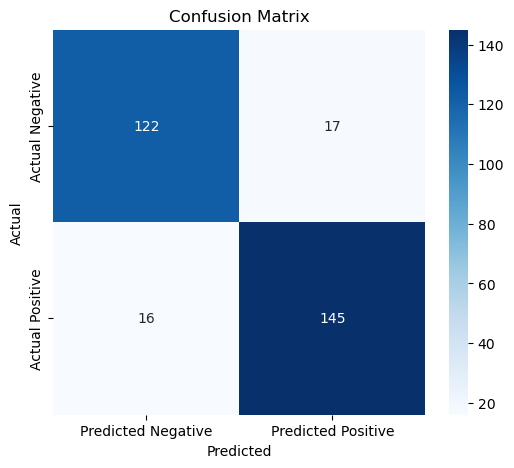

In [3]:
# 5. Evaluate the classifier

# a. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show("png")

### Interpretation

* True Positive (TP): The model correctly predicted the positive class.
* False Positive (FP): The model incorrectly predicted the positive class (Type I error).
* True Negative (TN): The model correctly predicted the negative class.
* False Negative (FN): The model incorrectly predicted the negative class (Type II error).

***

### Classification report

In [4]:
# b. Error Metrics
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       139
           1       0.90      0.90      0.90       161

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### Interpretation

### Class 0:
* Precision (0.88): Out of all the instances predicted as class 0, 88% were correctly predicted.
* Recall (0.88): Out of all the actual class 0 instances, 88% were correctly predicted.
* F1-Score (0.88): The harmonic mean of precision and recall for class 0.
* Support (139): There are 139 instances of class 0 in the test set.

### Class 1:
* Precision (0.90): Out of all the instances predicted as class 1, 90% were correctly predicted.
* Recall (0.90): Out of all the actual class 1 instances, 90% were correctly predicted.
* F1-Score (0.90): The harmonic mean of precision and recall for class 1.
* Support (161): There are 161 instances of class 1 in the test set.

### Overall Metrics:

* Accuracy (0.89): The overall accuracy of the model is 89%, meaning that 89% of the total predictions were correct.

* Macro Average:
Precision, Recall, F1-Score (0.89): The unweighted average of the precision, recall, and f1-score across all classes.

* Weighted Average:
Precision, Recall, F1-Score (0.89): The average of the precision, recall, and f1-score, weighted by the support of each class.

***

### Receiver Operating Characteristic (ROC) Curve

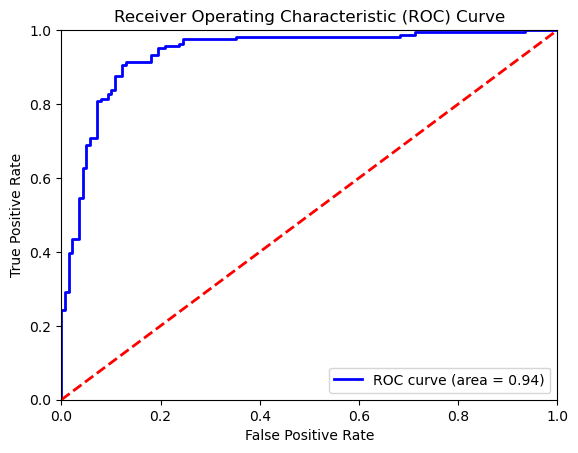

In [5]:
# c. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show("png")

### Interpretation

* X-axis (FPR): False Positive Rate. Lower values are better as they indicate fewer false positives.
* Y-axis (TPR): True Positive Rate. Higher values are better as they indicate more true positives.
* Blue Line: The ROC curve for the logistic regression model. It shows how the TPR and FPR change with different thresholds.
* Red Diagonal Line: Represents a random classifier with no predictive power.
* A perfect classifier would have a point at (0, 1) meaning 0 FPR and 1 TPR.

***

### AUC Score

In [8]:
# d. AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print("\nAUC Score: {:.2f}".format(auc_score))


AUC Score: 0.94


### Interpretation

* The AUC (Area Under the Curve) score summarizes the ROC curve.
* An AUC of 1 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.
* A higher AUC score indicates better overall performance.

***

### Conclusion:

### This notebook showcased various tools used for evaluating model performance on randomly generated data. Being able to interpret these tools and their results is key for understanding how well ML models perform on a given dataset. Critical evaluation metrics such as the confusion matrix, classification report, ROC curve, and AUC score were explored.

### The confusion matrix provided a detailed breakdown of true positives, false positives, true negatives, and false negatives, allowing us to see where the model is making correct and incorrect predictions. 

### The classification report further detailed the precision, recall, and F1-score for each class, offering a comprehensive view of the model's strengths and weaknesses.

### The ROC curve and AUC score were particularly useful in illustrating the trade-off between sensitivity and specificity across different thresholds, providing a holistic measure of model performance that goes beyond simple accuracy. 